  <img src="COMPARE_LOGO.jpg"  style="height: 100px;" align="left">  @WIGNER

#Ebola phylogenetic tree demo

In this [Ipython](http://ipython.org/) Notebook we demonstrate a possibble framework to run open science workflows in cloud environment. The Notebook itself is accessible with a web browser and the scripts run on a virtual machine in an OpenStack cloud and uses the Docker technology. In simple terms, this technology allows researchers to focus on the science without dealing with system and database administration. Because of the virtualization the notebook is acessible from anywhere, the collaboration, data and software tool sharing can be made easy. The Notebook is a nice way to combine low level analysis (like scripts) information and results (figures, maps, explanations, links). 

This simple notebook reconstructs some of the results in [Carroll et al. Nature 2015](http://www.nature.com/nature/journal/vaop/ncurrent/full/nature14594.html) paper titled *Temporal and spatial analysis of the 2014–2015 Ebola virus outbreak in West Africa*.

##Create working directory go into it

In [1]:
import subprocess
import os
subprocess.call(['mkdir','CarrollEtAl2015'])
os.chdir('CarrollEtAl2015/')

---
#Get assembly data

Ipython notebooks are capable to run non-python scripts though *cell magic*, by defining the type of the script with double-% in the first line of the command cell. Let's make a directory for our project and get the Excel file with accession numbers.

In [2]:
%%bash 
#/usr.host/bin/wget http://www.nature.com/nature/journal/vaop/ncurrent/extref/nature14594-s4.xlsx
wget http://www.nature.com/nature/journal/vaop/ncurrent/extref/nature14594-s4.xlsx

--2015-07-15 13:56:36--  http://www.nature.com/nature/journal/vaop/ncurrent/extref/nature14594-s4.xlsx
Resolving www.nature.com (www.nature.com)... 193.225.13.233, 193.225.13.230
Connecting to www.nature.com (www.nature.com)|193.225.13.233|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27311 (27K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: `nature14594-s4.xlsx.4'

     0K .......... .......... ......                          100% 4.29M=0.006s

2015-07-15 13:56:36 (4.29 MB/s) - `nature14594-s4.xlsx.4' saved [27311/27311]



Load the data.

In [3]:
#import sys
#sys.path.append('/usr.host/local/lib/python2.7/dist-packages')
import pandas as pd
xl = pd.ExcelFile("nature14594-s4.xlsx")
xl.sheet_names

[u'Patient_Data_Acc_No.s']

Peek into the table:

In [4]:
sample_description_df = xl.parse("Patient_Data_Acc_No.s")
sample_description_df.head()

,EMLab Name,Country,District,Date of onset of symptoms,Date Sample Collected,Date test performed,Clinical status at time of test,Assay CT Value,Malaria Co-Infection,GenBank Accession Number,Sequence_ID
0,EM_GUI_2014_079422,GIN,Macenta,--,2014-03-27,2014-04-01,--,16.18,--,KR817187,Ebola virus/H.sapiens-wt/GIN/2014/Makona-EM_0...
1,EM_GUI_2014_079423,GIN,Macenta,--,2014-03-27,2014-04-01,--,19.47,--,KR817188,Ebola virus/H.sapiens-wt/GIN/2014/Makona-EM_0...
2,EM_GUI_2014_079424,GIN,Macenta,--,2014-03-27,2014-04-01,--,19.52,--,KR817189,Ebola virus/H.sapiens-wt/GIN/2014/Makona-EM_0...
3,EM_GUI_2014_079404,GIN,Gueckedou,2014-03-21 00:00:00,2014-03-28,2014-03-30,dead,12.18,--,KR817179,Ebola virus/H.sapiens-wt/GIN/2014/Makona-EM_0...
4,EM_GUI_2014_079405,GIN,Gueckedou,--,2014-03-28,2014-03-30,dead,21.56,--,KR817180,Ebola virus/H.sapiens-wt/GIN/2014/Makona-EM_0...


Look into the columns for the exact columns names

In [5]:
print sample_description_df.columns

Index([u'EMLab Name', u'Country', u'District', u'Date of onset \nof symptoms', u'Date Sample \nCollected', u'Date test \nperformed', u'Clinical status \nat time of test', u'Assay\nCT Value', u'Malaria\nCo-Infection', u'GenBank\nAccession Number', u'Sequence_ID'], dtype='object')


Download data from ncbi to files
- Entrez is slow...

In [6]:
#from Bio import Entrez
#import subprocess
#Entrez.email = "dkribli@caesar.elte.hu"     # Always tell NCBI who you are
#subprocess.call(['mkdir','assembly'])
#for accession_number in sample_description_df['GenBank\nAccession Number']:
#    handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text")
#    output_handle=open('assembly/'+accession_number+'.txt','w')
#    output_handle.write(handle.read())
#    output_handle.close()
#    handle.close()

Parse the fasta files

In [7]:
#from Bio import SeqIO
#assemblies=set()
#for accession_number in sample_description_df['GenBank\nAccession Number']:
#    for seq_record in SeqIO.parse('assembly/'+accession_number+'.txt', "genbank") :
#        assemblies.add(seq_record)

Build tree ?
- assemblies are not aligned to each other (e.g.: have different legth)
- maybe this is not the data to use? 

In [8]:
#from Bio.Phylo.TreeConstruction import DistanceCalculator
#from Bio import AlignIO
#aln=AlignIO.MultipleSeqAlignment(list(assemblies))
#print aln
#from TreeConstruction import DistanceTreeConstructor
#constructor = DistanceTreeConstructor(calculator, 'nj')
#tree = constructor.build_tree(aln)

---
##Download aligned nexus format data

- Download the aligned nexus data from the supplementary

In [9]:
subprocess.call(['wget','http://www.nature.com/nature/journal/vaop/ncurrent/extref/nature14594-s2.txt'])

0

Load data

In [10]:
from Bio import AlignIO
aln = AlignIO.read('nature14594-s2.txt', 'nexus')

###Build tree with neighbour joining
- this is using small mem ( 0.5% )
- takes quite long (20mins)


- different methods?


In [12]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
calculator = DistanceCalculator('identity')
constructor = DistanceTreeConstructor(calculator, 'nj')

import time
start=time.time()
tree = constructor.build_tree(aln)
print 'It took: ', time.time()-start,'s'

It took:  1276.98241997 s


###Draw it with Phylo drawer


Recolor braches using country info
- Unfortunately I cannot link the supplementary table (with time etc..) and the names of the supplementary nexus file, because I dont know how to...

In [13]:
col_dict=dict({'GUI':'green','SLE':'blue',
               'SLe':'blue','LIB':'magenta','X':'grey',
              'DPR2':'yellow','DPR1':'red'})
for clade in tree.find_clades():
    if(len(clade.name.split('_')) > 1): #leaves
        clade.color=col_dict[clade.name.split('_')[4]]
    else: #internal branches
        clade.color='grey'

Plot some not very fancy tree
- this is a rather poor toolbox, we should use something else
    - networkx doesnt draw trees, so i think its not a good idea
    - some more fancy toolbox: ETE? http://etetoolkit.org/
- markers at leaves??

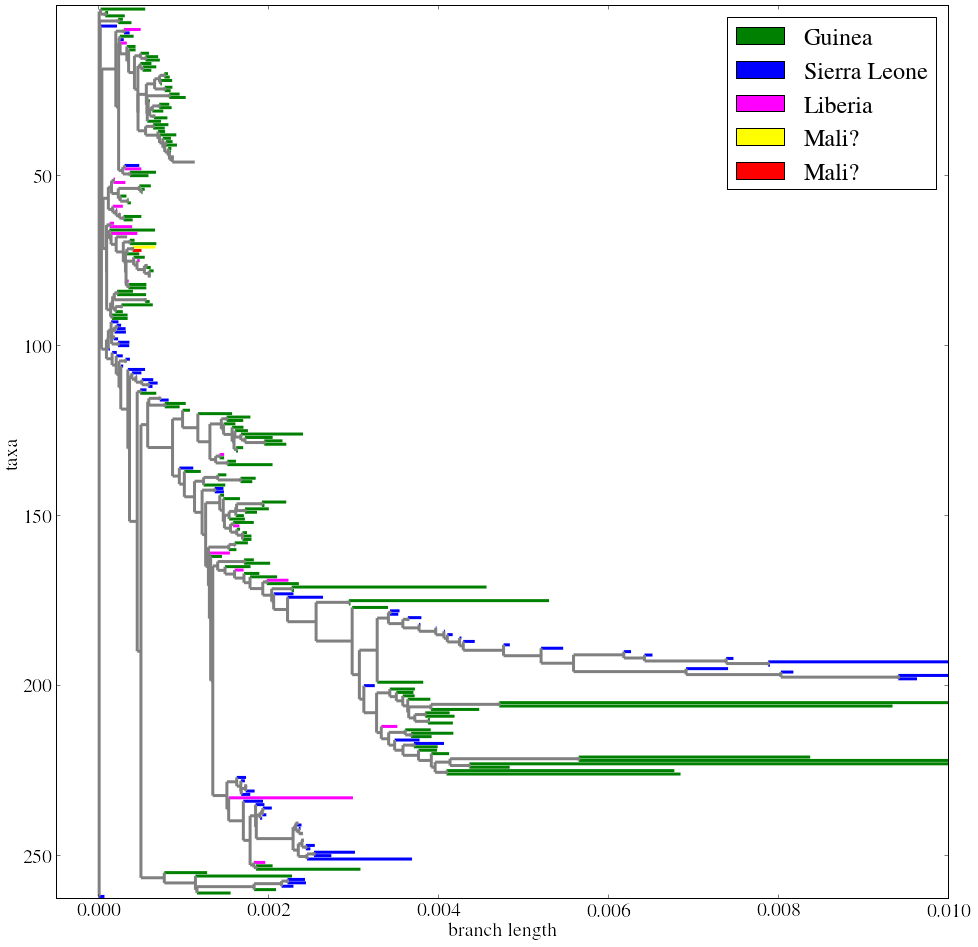

In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#some settings
matplotlib.rc('font', size=20)
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['figure.figsize'] =(16,16) 

fig,ax=plt.subplots()
#custom legend
gui_proxy = plt.Rectangle((0, 0), 1, 1, fc="green")
sle_proxy = plt.Rectangle((0, 0), 1, 1, fc="blue")
lib_proxy = plt.Rectangle((0, 0), 1, 1, fc="magenta")
dpr2_proxy = plt.Rectangle((0, 0), 1, 1, fc="yellow")
dpr1_proxy = plt.Rectangle((0, 0), 1, 1, fc="red")
ax.legend([gui_proxy,sle_proxy,lib_proxy,dpr2_proxy,dpr1_proxy],
          ['Guinea','Sierra Leone','Liberia','Mali?','Mali?'])

#draw tree
def my_label(clade):
        return None
Phylo.draw(tree,my_label,axes=ax,xlim=(-0.0005,0.01))

---
#Build tree with parsimony tree builder

- input is the output of nj
- now this is very slow!!! (210 minutes now)

In [18]:
from Bio.Phylo.TreeConstruction import *

start=time.time()

starting_tree = copy.deepcopy(tree)
scorer = ParsimonyScorer()
searcher = NNITreeSearcher(scorer)
constructor = ParsimonyTreeConstructor(searcher, starting_tree)
pars_tree = constructor.build_tree(aln)

print 'It took: ', time.time()-start,'s'

It took:  109716.685185 s


Write it for later

In [19]:
Phylo.write(pars_tree,'bio_phylo_parsimony_tree.nw','newick')

1

#Plot it
- Whats the difference??

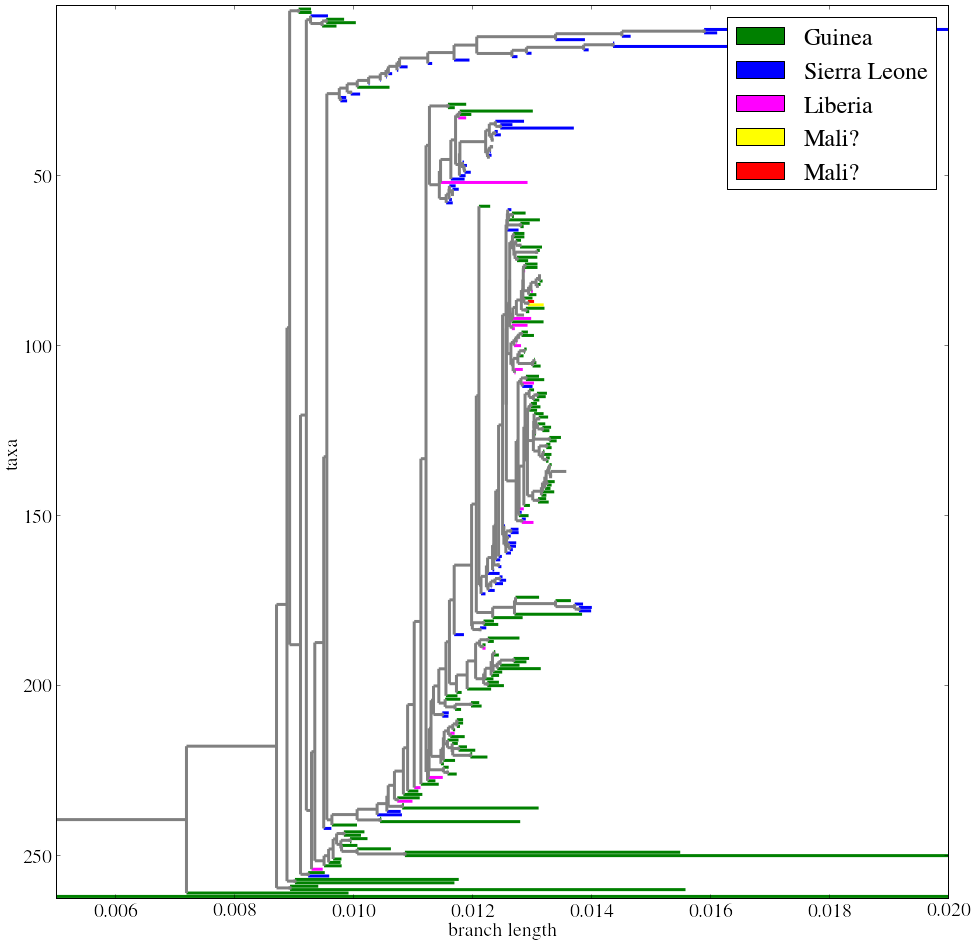

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#some settings
matplotlib.rc('font', size=20)
matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['figure.figsize'] =(16,16) 

fig,ax=plt.subplots()
#custom legend
gui_proxy = plt.Rectangle((0, 0), 1, 1, fc="green")
sle_proxy = plt.Rectangle((0, 0), 1, 1, fc="blue")
lib_proxy = plt.Rectangle((0, 0), 1, 1, fc="magenta")
dpr2_proxy = plt.Rectangle((0, 0), 1, 1, fc="yellow")
dpr1_proxy = plt.Rectangle((0, 0), 1, 1, fc="red")
ax.legend([gui_proxy,sle_proxy,lib_proxy,dpr2_proxy,dpr1_proxy],
          ['Guinea','Sierra Leone','Liberia','Mali?','Mali?'])

#draw tree
def my_label(clade):
        return None
Phylo.draw(pars_tree,my_label,axes=ax,xlim=(0.005,0.02))

---
#(todo) Build tree with MrBayes
- http://mrbayes.sourceforge.net/
- downloaded and complied here:  ~/tools/mrbayes/mrbayes_3.2.5/src/
- input must be in nexus format

Download nexus files from nature

In [18]:
subprocess.call(['wget','http://www.nature.com/nature/journal/vaop/ncurrent/extref/nature14594-s2.txt'])

0

---
#(todo) Build tree with BEAST
- http://beast.bio.ed.ac.uk/
- this was mentioned at COMPARE kick-off meeting as software choice of WP1

In [17]:
subprocess.call(['wget','http://www.nature.com/nature/journal/vaop/ncurrent/extref/nature14594-s3.xml'])
#input_BEAST=Phylo.read('nature14594-s3.xml')

0

# Notebook ends here - 